# 1. Climate Analysis and Exploration

#### To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database

## Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import table
import datetime as dt
import datetime
import scipy.stats as stats

## Reflect Tables into SQLAlchemy

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
dir(session)

['_Session__binds',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_bind',
 '_after_attach',
 '_autoflush',
 '_before_attach',
 '_bulk_save_mappings',
 '_close_impl',
 '_conditional_expire',
 '_connection_for_bind',
 '_contains_state',
 '_delete_impl',
 '_deleted',
 '_dirty_states',
 '_enable_transaction_accounting',
 '_expire_state',
 '_expunge_states',
 '_flush',
 '_flush_warning',
 '_flushing',
 '_identity_cls',
 '_is_clean',
 '_merge',
 '_new',
 '_query_cls',
 '_register_altered',
 '_register_persistent',
 '_remove_newly_deleted',
 '_save_impl',
 '_save_or_update_impl',
 '_save_or_update_state',
 '_update_impl',
 '_validate_persi

## Exploratory Climate Analysis

### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [9]:
# Set column info to vars
date = Measurement.date
prcp = Measurement.prcp

#### Calculate the date 1 year ago from the last data point in the database

In [10]:
#Displaying the last data point of the measurement data
session.query(Measurement.date).all()[-1]

('2017-08-23')

In [11]:
last_yr = dt.date(2017,8,23) - dt.timedelta(days=365)
last_yr

datetime.date(2016, 8, 23)

#### Query to retrieve all date and prcp data for a year

In [12]:
result = session.query(date, prcp).filter(Measurement.date >= last_yr).all()
result

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

#### Save the query results as a Pandas DataFrame and set the index to the date column

In [13]:
#Creating a DF using Pandas
results_df = pd.DataFrame(result, columns=['Date','Precipitation'])

# Converting the Date column into date type
results_df['Date'] = pd.to_datetime(results_df['Date'])

# Setting the index into Date Column
results_df.set_index(results_df['Date'],inplace=True)

# Dropping the repeated column of Date 
results_df = results_df.drop(columns="Date")

# Sorting the DF by date
results_df.sort_values('Date')

#Displaying the results
results_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [14]:
len(results_df)

2230

#### Use Pandas Plotting with Matplotlib to plot the data

Text(0, 0.5, 'Inches')

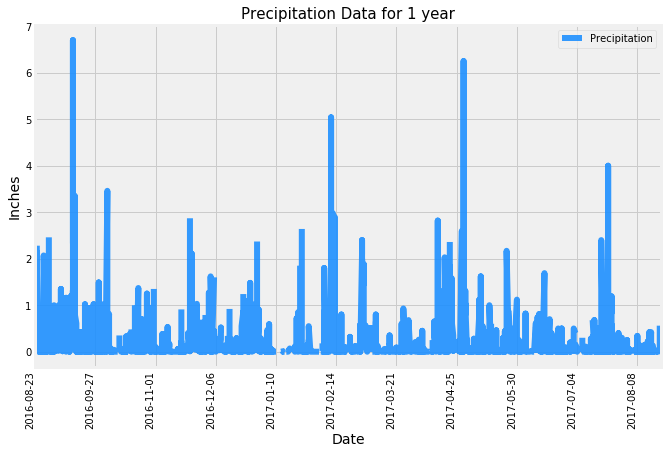

In [15]:
# Variables to be plotted
xaxis = results_df.index
yaxis = results_df["Precipitation"]

# Formatting the date
date_form = DateFormatter("%Y-%m-%d")

# Plotting the results using the DF plot method
ax = results_df.plot(color='dodgerblue', alpha=0.9, figsize=(10,7), rot=90, linewidth=6)
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick using (interval=10) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
ax.set_xlim([datetime.date(2016,8,23),datetime.date(2017,8,22)])

# Aesthetics for the chart
plt.title("Precipitation Data for 1 year", fontsize = 15)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Inches", fontsize = 14)

#### Use Pandas to print the summary statistics for the precipitation data

In [16]:
results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
station_count

[(9)]

#### What are the most active stations? (i.e. what stations have the most rows)?
        - List the stations and the counts in descending order.

In [18]:
stations_list = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#### Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature of the most active station?

In [19]:
temp_query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').all()
temp_query

[(54.0, 85.0, 71.66378066378067)]

#### Choose the station with the highest number of temperature observations
        - Query the last 12 months of temperature observation data for this station

In [20]:
highest_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= last_yr).\
    filter(Measurement.station =='USC00519281').all()

high_tobs_df = pd.DataFrame(highest_temp, columns=['Date', 'TOBS'])
high_tobs_df

,Date,TOBS
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


        - Plot the results as a histogram

Text(0, 0.5, 'Frequency')

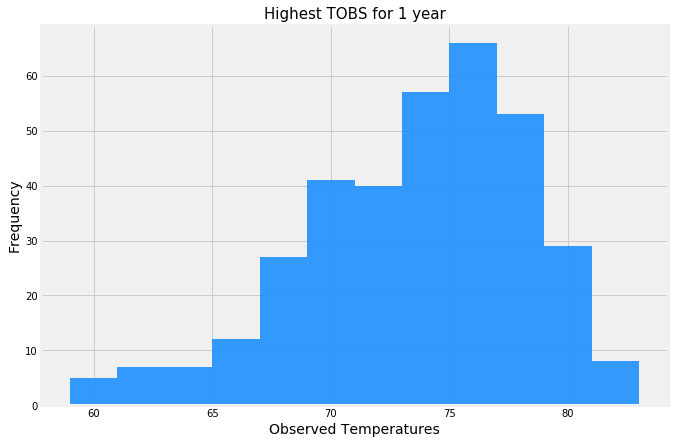

In [21]:
# Plotting the results using the DF plot method

high_tobs_df.hist(color='dodgerblue', bins=12, alpha=0.9, figsize=(10,7))

# Aesthetics for the chart
plt.title("Highest TOBS for 1 year", fontsize = 15)
plt.xlabel("Observed Temperatures", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)



# Bonus Challenge Assignments:

## Temperature Analysis I

    - Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?
    - You may either use SQLAlchemy or pandas's read_csv() to perform this portion.
    - Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.
    - Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [22]:
# Let's use panda's read_csv() to carry out this portion

#Reading the stations csv file
hawaii_stations = pd.read_csv('Resources/hawaii_stations.csv')
hawaii_stations

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [23]:
#Reading the measurements csv file

hawaii_measurements = pd.read_csv('Resources/hawaii_measurements.csv')
hawaii_measurements

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,NaN,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [24]:
# Identifying the average June and December temperatures and grouping the measurements by station

# June Average Temperatures

av_june_temp = hawaii_measurements[hawaii_measurements['date'].str.slice(start=5, stop=7)=='06'].groupby(hawaii_measurements['station']).mean()
av_june_temp

,prcp,tobs
station,,
USC00511918,0.015157,74.139394
USC00513117,0.118248,74.050847
USC00514830,0.114192,76.005376
USC00516128,0.495748,71.937220
USC00517948,0.057975,76.655405
USC00518838,0.094615,73.394737
USC00519281,0.151525,73.271186
USC00519397,0.022661,77.559322
USC00519523,0.050044,76.668103


In [25]:
# December Average Temperatures
av_dec_temp = hawaii_measurements[hawaii_measurements['date'].str.slice(start=5, stop=7)=='12'].groupby(hawaii_measurements['station']).mean()
av_dec_temp

,prcp,tobs
station,,
USC00511918,0.138146,69.684211
USC00513117,0.203241,71.069444
USC00514830,0.154966,73.224719
USC00516128,0.507005,69.291262
USC00517948,0.152727,71.834862
USC00518838,0.638182,72.421053
USC00519281,0.244931,69.903226
USC00519397,0.075314,71.109524
USC00519523,0.162010,72.433333


In [26]:
stats.ttest_ind(av_june_temp['tobs'], av_dec_temp['tobs'], equal_var=False)

Ttest_indResult(statistic=4.615865424404701, pvalue=0.0003657335214469917)

### My findings: 

#### We used unpaired T test since we assumed that the measurments from June and December are independent from each other. The dataset consist of distinct test subjects
#### The results of the T test (statistic and pvalue) reflect that there is a statistically significant difference between June and December average temperatures. 

## Temperature Analysis II

    - This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' and return the minimum, average, and maximum temperatures for that range of dates

In [27]:
# calc_temps function
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [28]:
# Calculating start_date and end_date in the format specified for the the matching dates from the previous year

lst_start_date = dt.date(2017, 1, 1) - dt.timedelta(days=365)
lst_end_date = dt.date(2017, 1, 14) - dt.timedelta(days=365)

print(lst_start_date)
print(lst_end_date)

2016-01-02
2016-01-15


    - Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax for your trip using the previous year's data for those same dates.

In [29]:
# This function will display tmin, tavg and tmax for my trip (same dates)
trip_tobs = calc_temps(lst_start_date.strftime("%Y-%m-%d"), lst_end_date.strftime("%Y-%m-%d"))
trip_tobs

[(62.0, 69.81927710843374, 78.0)]

In [30]:
# Let's display the results:
tmin = trip_tobs[0][0]
tavg = round(trip_tobs[0][1],2)
tmax = trip_tobs[0][2]
print(f'tmin = {tmin}')
print(f'tavg = {tavg}')
print(f'tmax = {tmax}')

tmin = 62.0
tavg = 69.82
tmax = 78.0


    - Plot the results from your previous query as a bar chart. 
    - Use "Trip Avg Temp" as your Title
    - Use the average temperature for the y value
    - Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

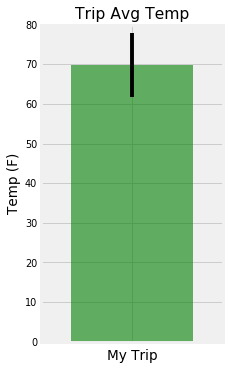

Peak-to-Peak Value is 8.0 F


In [31]:
#Defining the peak-topeak value before plotting
yerr=(tmax-tmin)/2

#Plotting with Pyplot following the above instructions
plt.figure(figsize=(3, 6), dpi=70) # Figure size
plt.bar([""],tavg, yerr=(tmax-tmin)/2, color='green', alpha=0.6)

# Aesthetics for the chart
plt.title("Trip Avg Temp", fontsize=16)
plt.xlabel("My Trip", fontsize=14)
plt.ylabel("Temp (F)", fontsize=14)
plt.ylim(0,80)
plt.xlim(-0.6,0.6)
plt.show()

print(f'Peak-to-Peak Value is {yerr} F')

## Daily Rainfall Average

    - Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates
    - Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [32]:
# Creating a list with the above details
sel = [Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

# Filtersing per weather station and my trip previous year's matching dates and grouping by station name in descending order

results = session.query(*sel).\
            filter(Measurement.station == Station.station).\
            filter(Measurement.date >= lst_start_date).\
            filter(Measurement.date >= lst_end_date).\
            group_by(Station.name).\
            order_by(func.sum(Measurement.prcp).desc()).all()
results

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  228.71999999999997),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  122.54000000000012),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  86.15999999999991),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  57.95999999999999),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  48.550000000000004),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  26.580000000000005),
 ('USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  6.359999999999999)]

     - Create a query that will calculate the daily normals 
        (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

In [33]:
# Our given function named daily_normals

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# Example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# Setting the start and end date of the trip
start_date = dt.date(2017, 1, 1)
end_date = dt.date(2017, 1, 14)
lst_start_date = dt.date(2017, 1, 1).strftime("%m-%d")
lst_end_date = dt.date(2017,1, 14).strftime("%m-%d")

print(start_date)
print(end_date)
print(lst_start_date)
print(lst_end_date)

2017-01-01
2017-01-14
01-01
01-14


In [35]:
# Use the start and end date to create a range of dates

results = session.query(Measurement.date).order_by(Measurement.date).\
           filter(Measurement.date>=start_date).\
           filter(Measurement.date<=end_date).distinct()
results

In [36]:
# Stip off the year and save a list of %m-%d strings

my_dates = pd.DataFrame(results.all())
my_dates_df = my_dates.set_index('date')
my_dates_df

""
date
2017-01-01
2017-01-02
2017-01-03
2017-01-04
2017-01-05
2017-01-06
2017-01-07
2017-01-08
2017-01-09


In [37]:
# Converting the format from %Y-%m-%d to %m-%d

month_format = my_dates['date'].str.slice(start=5)
month_format

0     01-01
1     01-02
2     01-03
3     01-04
4     01-05
5     01-06
6     01-07
7     01-08
8     01-09
9     01-10
10    01-11
11    01-12
12    01-13
13    01-14
Name: date, dtype: object

In [38]:
# Loop through the list of %m-%d strings and calculate the normals for each date
day_normals=[]

for month in range(len(month_format)):
    day = daily_normals(month_format[month])[0]
    day_normals.append(tuple(day))
day_normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0),
 (57.0, 67.16071428571429, 75.0),
 (58.0, 67.9298245614035, 78.0),
 (62.0, 69.74137931034483, 77.0),
 (57.0, 67.3103448275862, 78.0),
 (57.0, 67.4074074074074, 81.0),
 (57.0, 67.25454545454545, 77.0),
 (58.0, 69.52631578947368, 77.0)]

In [39]:
# Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

df = pd.DataFrame(day_normals, columns = ['tmin','tavg', 'tmax'] )
my_df = pd.merge(my_dates, df, left_index=True, right_index=True)
my_df = my_df.set_index('date')
my_df

,tmin,tavg,tmax
date,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0
2017-01-06,61.0,68.964912,76.0
2017-01-07,57.0,68.543860,76.0
2017-01-08,57.0,67.160714,75.0
2017-01-09,58.0,67.929825,78.0


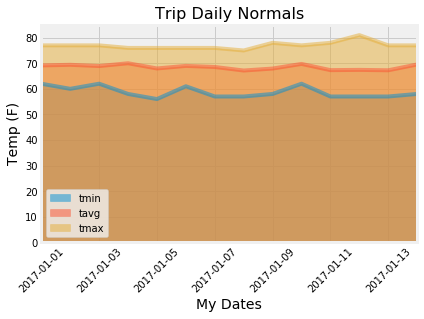

In [40]:
# Plot the daily normals as an area plot with `stacked=False`

ax = my_df.plot.area(stacked=False, rot=45)

# Aesthetics for the chart
plt.title("Trip Daily Normals", fontsize=16)
plt.xlabel("My Dates", fontsize=14)
plt.ylabel("Temp (F)", fontsize=14)
plt.show()

# Script for the Climate App

### Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

#### - Use Flask to create your routes.

### /api/v1.0/precipitation
    - Convert the query results to a dictionary using date as the key and prcp as the value.
    - Return the JSON representation of your dictionary.

In [41]:
# This variable is called from Climate_app
results_dic = dict(result)
results_dic

{'2016-08-23': 0.7,
 '2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 

### /api/v1.0/stations
    - Return a JSON list of stations from the dataset.

In [42]:
my_stations = session.query(Station.station, Station.name).all()
my_stations_dic = dict(my_stations)
my_stations_dic

{'USC00519397': 'WAIKIKI 717.2, HI US',
 'USC00513117': 'KANEOHE 838.1, HI US',
 'USC00514830': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'USC00517948': 'PEARL CITY, HI US',
 'USC00518838': 'UPPER WAHIAWA 874.3, HI US',
 'USC00519523': 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'USC00519281': 'WAIHEE 837.5, HI US',
 'USC00511918': 'HONOLULU OBSERVATORY 702.2, HI US',
 'USC00516128': 'MANOA LYON ARBO 785.2, HI US'}

### /api/v1.0/tobs
    - Query the dates and temperature observations of the most active station for the last year of data.
    - Return a JSON list of temperature observations (TOBS) for the previous year.

In [43]:
values=trip_tobs[0]
keys = ('tmin','tavg','tmax')

my_tobs = dict(zip(keys,values))
my_tobs

{'tmin': 62.0, 'tavg': 69.81927710843374, 'tmax': 78.0}

### Start and End Dates
    - Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
    - When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
    - When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

In [44]:
# <start>
start = dt.date(2017, 8, 1)
print(start)

2017-08-01


In [45]:
# /api/v1.0/<start>
# - Return a JSON list of the minimum temperature, the average temperature,
# and the max temperature for a given start or start-end range.
# - When given the start only, calculate TMIN, TAVG, and TMAX for all dates 
# greater than and equal to the start date.

stats_dict={}
start_values = session.query(Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start).group_by(Measurement.date).all()

for record in start_values:
        (date, tmin, tavg, tmax) = record
        stats_dict[date] = [{"tmin":tmin, "tavg":round(tavg, 2), "tmax":tmax}]
        
stats_dict

{'2017-08-01': [{'tmin': 72.0, 'tavg': 74.5, 'tmax': 77.0}],
 '2017-08-02': [{'tmin': 73.0, 'tavg': 79.0, 'tmax': 83.0}],
 '2017-08-03': [{'tmin': 76.0, 'tavg': 79.0, 'tmax': 81.0}],
 '2017-08-04': [{'tmin': 77.0, 'tavg': 80.0, 'tmax': 82.0}],
 '2017-08-05': [{'tmin': 77.0, 'tavg': 80.0, 'tmax': 82.0}],
 '2017-08-06': [{'tmin': 79.0, 'tavg': 81.4, 'tmax': 83.0}],
 '2017-08-07': [{'tmin': 78.0, 'tavg': 80.5, 'tmax': 83.0}],
 '2017-08-08': [{'tmin': 74.0, 'tavg': 78.5, 'tmax': 82.0}],
 '2017-08-09': [{'tmin': 71.0, 'tavg': 77.33, 'tmax': 81.0}],
 '2017-08-10': [{'tmin': 75.0, 'tavg': 79.25, 'tmax': 81.0}],
 '2017-08-11': [{'tmin': 72.0, 'tavg': 78.0, 'tmax': 81.0}],
 '2017-08-12': [{'tmin': 74.0, 'tavg': 79.0, 'tmax': 83.0}],
 '2017-08-13': [{'tmin': 77.0, 'tavg': 80.6, 'tmax': 84.0}],
 '2017-08-14': [{'tmin': 75.0, 'tavg': 78.2, 'tmax': 81.0}],
 '2017-08-15': [{'tmin': 70.0, 'tavg': 77.2, 'tmax': 82.0}],
 '2017-08-16': [{'tmin': 71.0, 'tavg': 77.0, 'tmax': 82.0}],
 '2017-08-17': [{'tmin

In [46]:
# /api/v1.0/<start>/<end>
# When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.

end = dt.date(2017, 8, 20)
end_stats_dict={}
end_values = session.query(Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start).filter(Measurement.date <= end).group_by(Measurement.date).all()

for record in end_values:
        (date, tmin, tavg, tmax) = record
        end_stats_dict[date] = [{"tmin":tmin, "tavg":round(tavg, 2), "tmax":tmax}]
        
end_stats_dict

{'2017-08-01': [{'tmin': 72.0, 'tavg': 74.5, 'tmax': 77.0}],
 '2017-08-02': [{'tmin': 73.0, 'tavg': 79.0, 'tmax': 83.0}],
 '2017-08-03': [{'tmin': 76.0, 'tavg': 79.0, 'tmax': 81.0}],
 '2017-08-04': [{'tmin': 77.0, 'tavg': 80.0, 'tmax': 82.0}],
 '2017-08-05': [{'tmin': 77.0, 'tavg': 80.0, 'tmax': 82.0}],
 '2017-08-06': [{'tmin': 79.0, 'tavg': 81.4, 'tmax': 83.0}],
 '2017-08-07': [{'tmin': 78.0, 'tavg': 80.5, 'tmax': 83.0}],
 '2017-08-08': [{'tmin': 74.0, 'tavg': 78.5, 'tmax': 82.0}],
 '2017-08-09': [{'tmin': 71.0, 'tavg': 77.33, 'tmax': 81.0}],
 '2017-08-10': [{'tmin': 75.0, 'tavg': 79.25, 'tmax': 81.0}],
 '2017-08-11': [{'tmin': 72.0, 'tavg': 78.0, 'tmax': 81.0}],
 '2017-08-12': [{'tmin': 74.0, 'tavg': 79.0, 'tmax': 83.0}],
 '2017-08-13': [{'tmin': 77.0, 'tavg': 80.6, 'tmax': 84.0}],
 '2017-08-14': [{'tmin': 75.0, 'tavg': 78.2, 'tmax': 81.0}],
 '2017-08-15': [{'tmin': 70.0, 'tavg': 77.2, 'tmax': 82.0}],
 '2017-08-16': [{'tmin': 71.0, 'tavg': 77.0, 'tmax': 82.0}],
 '2017-08-17': [{'tmin